## Snippet 1

In [1]:
using DataFrames
ages = readtable("data/longevity.csv")

,Smokes,AgeAtDeath
1,1,75
2,1,72
3,1,66
4,1,74
5,1,69
6,1,65
7,1,72
8,1,76
9,1,67
10,1,65


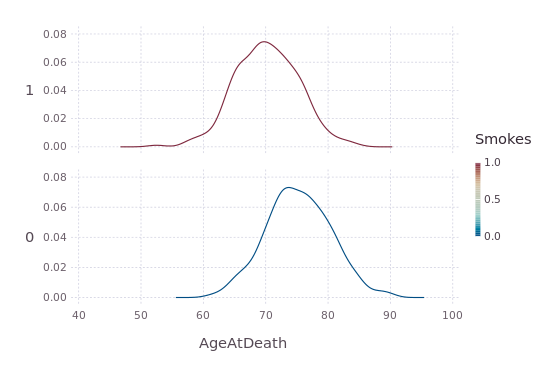

In [2]:
using Gadfly
plot(ages, ygroup="Smokes" ,x="AgeAtDeath", color="Smokes", Geom.subplot_grid(Geom.density))

### Snippet 2

In [3]:
guess = 73
mean((ages[:AgeAtDeath] .- guess) .^ 2)

32.991

### Snippet 3

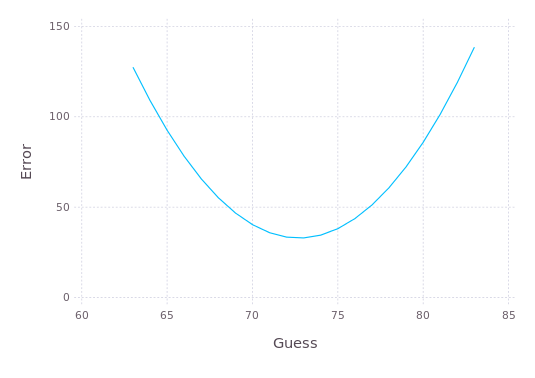

In [4]:
accurracy = DataFrame(Guess =  0.0, Error = 0.0)

for guess in 63:83
    erro = mean((ages[:AgeAtDeath] .- guess) .^ 2)
    push!(accurracy, @data([guess, erro]))
end

deleterows!(accurracy, 1)

plot(accurracy, x="Guess", y="Error", Geom.line)

## Snippet 4

In [5]:
guess = mean(ages[:AgeAtDeath])
sqrt(mean((ages[:AgeAtDeath] .- guess) .^ 2))


5.737096042424252

In [6]:
smokers = ages[ages[:Smokes] .== 1, :]
smokersguess = mean(smokers[:AgeAtDeath])

70.192

In [7]:
nonsmokers = ages[ages[:Smokes] .== 0, :]
nonsmokersguess = mean(nonsmokers[:AgeAtDeath])

75.254

In [8]:
ages[:NewPrediction] = zeros(nrow(ages))

for i in 1:nrow(ages)
    if ages[i, :Smokes] == 0
        ages[i, :NewPrediction] = nonsmokersguess
    else
        ages[i, :NewPrediction] = smokersguess
    end
end

sqrt(mean((ages[:AgeAtDeath] .- ages[:NewPrediction]).^2))


5.148622145778423